In [1]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 15.8 MB/s eta 0:00:00


In [2]:
import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
drive.mount('/content/drive/')
data_root = '/content/drive/MyDrive/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
raw_train = mne.io.read_raw_edf(f"{data_root}sleep-cassette/SC4001E0-PSG.edf", preload=True, infer_types = True, stim_channel="Event marker")
#raw = mne.io.read_raw_edf(f"{data_root}sleep-cassette/SC4001E0-PSG.edf", preload=True, infer_types = True, stim_channel="Event marker")
annot_train = mne.read_annotations(f"{data_root}sleep-cassette/SC4001EC-Hypnogram.edf")

#raw.set_annotations(annot)
raw_train.set_annotations(annot_train, emit_warning=False)

Extracting EDF parameters from /content/drive/MyDrive/sleep-cassette/SC4001E0-PSG.edf...
EDF file detected
Channel 'EEG Fpz-Cz' recognized as type EEG (renamed to 'Fpz-Cz').
Channel 'EEG Pz-Oz' recognized as type EEG (renamed to 'Pz-Oz').
Channel 'EOG horizontal' recognized as type EOG (renamed to 'horizontal').
Channel 'Resp oro-nasal' recognized as type RESP (renamed to 'oro-nasal').
Channel 'EMG submental' recognized as type EMG (renamed to 'submental').
Channel 'Temp rectal' recognized as type TEMP (renamed to 'rectal').
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


Measurement date,"April 24, 1989 16:13:00 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,"2 EEG, 1 EOG, 1 RESP, 1 EMG, 1 Temperature, 1 Stimulus"
Bad channels,None
EOG channels,horizontal
ECG channels,Not available
Sampling frequency,100.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


Using matplotlib as 2D backend.


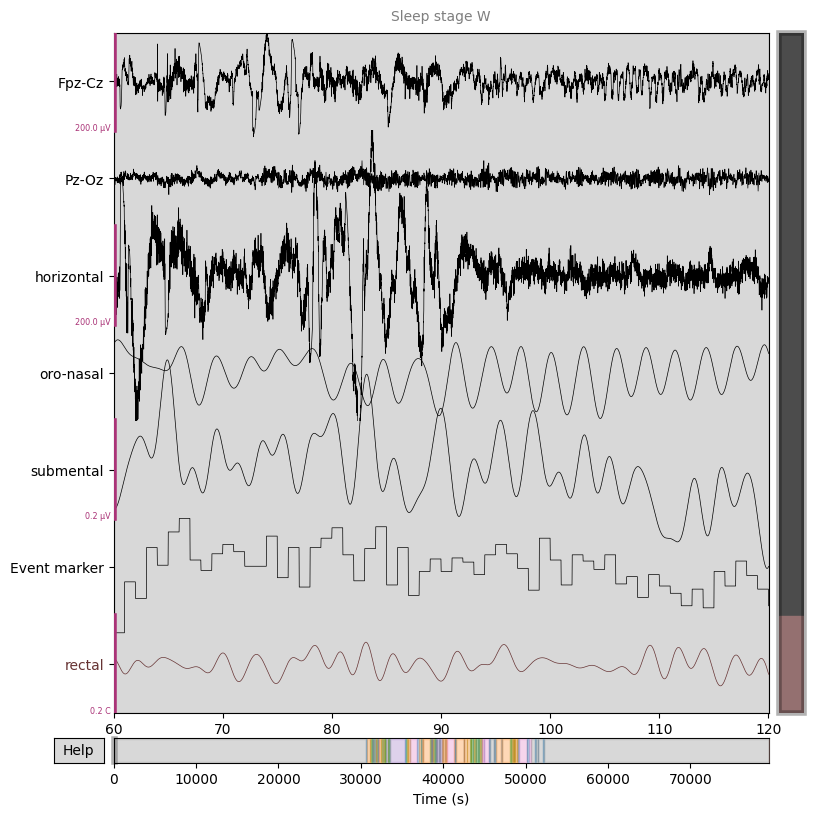

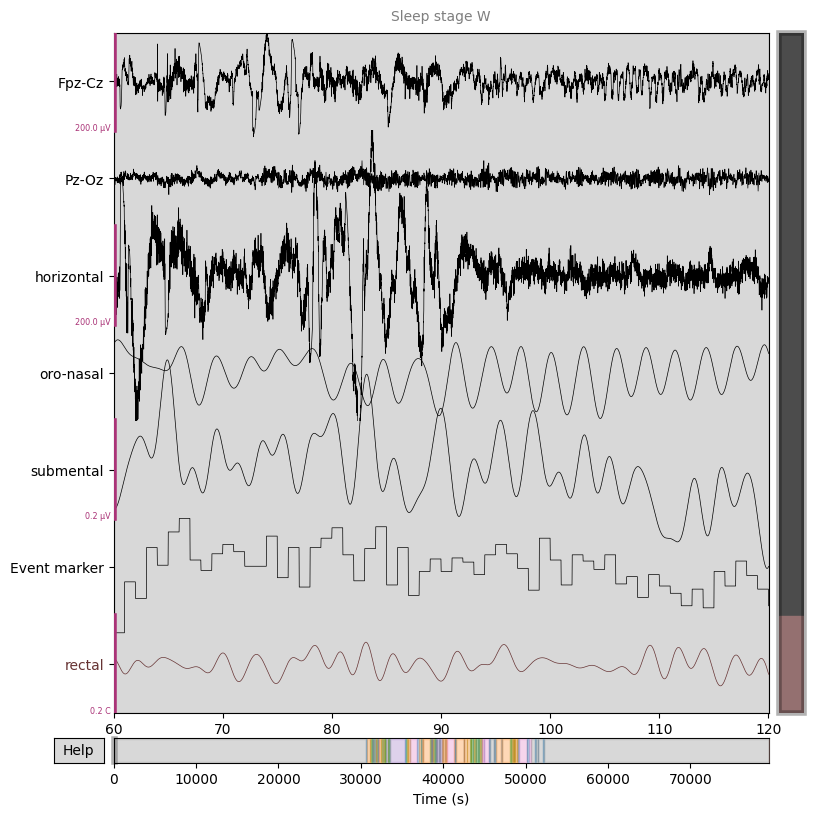

In [5]:
raw_train.plot(
    start=60,
    duration=60,
    scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7, misc=1e-1)
)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


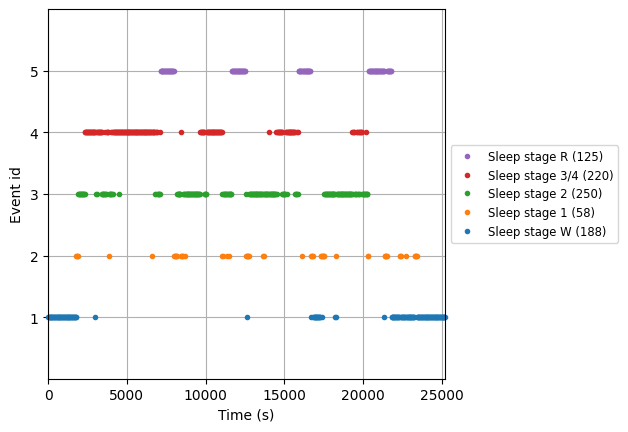

In [6]:
annotation_desc_2_event_id = {
    "Sleep stage W": 1,
    "Sleep stage 1": 2,
    "Sleep stage 2": 3,
    "Sleep stage 3": 4,
    "Sleep stage 4": 4,
    "Sleep stage R": 5,
}

# keep last 30-min wake events before sleep and first 30-min wake events after
# sleep and redefine annotations on raw data
annot_train.crop(annot_train[1]["onset"] - 30 * 60, annot_train[-2]["onset"] + 30 * 60)
raw_train.set_annotations(annot_train, emit_warning=False)

events_train, _ = mne.events_from_annotations(
    raw_train, event_id=annotation_desc_2_event_id, chunk_duration=30.0
)

# create a new event_id that unifies stages 3 and 4
event_id = {
    "Sleep stage W": 1,
    "Sleep stage 1": 2,
    "Sleep stage 2": 3,
    "Sleep stage 3/4": 4,
    "Sleep stage R": 5,
}

# plot events
fig = mne.viz.plot_events(
    events_train,
    event_id=event_id,
    sfreq=raw_train.info["sfreq"],
    first_samp=events_train[0, 0],
)

# keep the color-code for further plotting
stage_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]


In [7]:
tmax = 30.0 - 1.0 / raw_train.info["sfreq"]  # tmax in included

epochs_train = mne.Epochs(
    raw=raw_train,
    events=events_train,
    event_id=event_id,
    tmin=0.0,
    tmax=tmax,
    baseline=None,
)
del raw_train

print(epochs_train)


Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  841 events (good & bad), 0 – 29.99 s, baseline off, ~13 kB, data not loaded,
 'Sleep stage W': 188
 'Sleep stage 1': 58
 'Sleep stage 2': 250
 'Sleep stage 3/4': 220
 'Sleep stage R': 125>


In [8]:
raw_test = mne.io.read_raw_edf(
    f"{data_root}sleep-cassette/SC4002E0-PSG.edf", stim_channel="Event marker", infer_types=True, preload=True
)
annot_test = mne.read_annotations(f"{data_root}sleep-cassette/SC4002EC-Hypnogram.edf")
annot_test.crop(annot_test[1]["onset"] - 30 * 60, annot_test[-2]["onset"] + 30 * 60)
raw_test.set_annotations(annot_test, emit_warning=False)
events_test, _ = mne.events_from_annotations(
    raw_test, event_id=annotation_desc_2_event_id, chunk_duration=30.0
)
epochs_test = mne.Epochs(
    raw=raw_test,
    events=events_test,
    event_id=event_id,
    tmin=0.0,
    tmax=tmax,
    baseline=None,
)
del raw_test

print(epochs_test)

Extracting EDF parameters from /content/drive/MyDrive/sleep-cassette/SC4002E0-PSG.edf...
EDF file detected
Channel 'EEG Fpz-Cz' recognized as type EEG (renamed to 'Fpz-Cz').
Channel 'EEG Pz-Oz' recognized as type EEG (renamed to 'Pz-Oz').
Channel 'EOG horizontal' recognized as type EOG (renamed to 'horizontal').
Channel 'Resp oro-nasal' recognized as type RESP (renamed to 'oro-nasal').
Channel 'EMG submental' recognized as type EMG (renamed to 'submental').
Channel 'Temp rectal' recognized as type TEMP (renamed to 'rectal').
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8489999  =      0.000 ... 84899.990 secs...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
1127 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1127 events (good & bad), 0 – 29.99 s, baseline off, ~13 kB, data not loaded,
 'Sleep stage W

Using data from preloaded Raw for 58 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Using data from preloaded Raw for 250 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Using data from preloaded Raw for 220 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Using data from preloaded Raw for 125 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Using data from preloaded Raw for 188 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Using data from preloaded Raw for 59 events and 3000 original

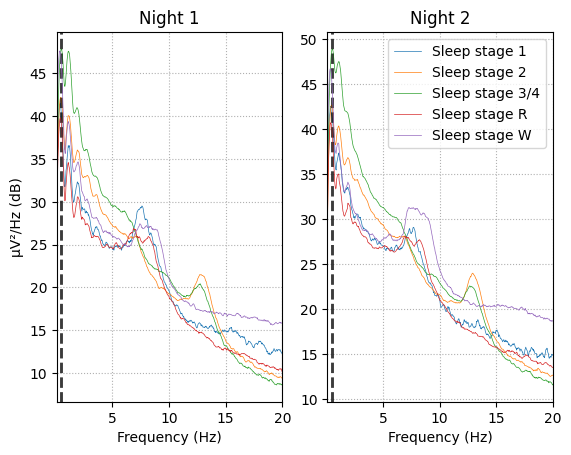

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

# iterate over the subjects
stages = sorted(event_id.keys())
for ax, title, epochs in zip([ax1, ax2], ["Night 1", "Night 2"], [epochs_train, epochs_test]):
    for stage, color in zip(stages, stage_colors):
        spectrum = epochs[stage].compute_psd(fmin=0.1, fmax=20.0)
        spectrum.plot(
            ci=None,
            color=color,
            axes=ax,
            show=False,
            average=True,
            spatial_colors=False,
            picks="data",
            exclude="bads",
        )
    ax.set(title=title, xlabel="Frequency (Hz)")
ax1.set(ylabel="µV²/Hz (dB)")
ax2.legend(ax2.lines[2::3], stages)

In [10]:
def eeg_power_band(epochs):
    """EEG relative power band feature extraction.

    This function takes an ``mne.Epochs`` object and creates EEG features based
    on relative power in specific frequency bands that are compatible with
    scikit-learn.

    Parameters
    ----------
    epochs : Epochs
        The data.

    Returns
    -------
    X : numpy array of shape [n_samples, 5]
        Transformed data.
    """
    # specific frequency bands
    FREQ_BANDS = {
        "delta": [0.5, 4.5],
        "theta": [4.5, 8.5],
        "alpha": [8.5, 11.5],
        "sigma": [11.5, 15.5],
        "beta": [15.5, 30],
    }

    spectrum = epochs.compute_psd(picks="eeg", fmin=0.5, fmax=30.0)
    psds, freqs = spectrum.get_data(return_freqs=True)
    # Normalize the PSDs
    psds /= np.sum(psds, axis=-1, keepdims=True)

    X = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_band = psds[:, :, (freqs >= fmin) & (freqs < fmax)].mean(axis=-1)
        X.append(psds_band.reshape(len(psds), -1))

    return np.concatenate(X, axis=1)

In [11]:
import mne
import pandas as pd
import numpy as np

# Define your file paths
data_root = '/content/drive/MyDrive/sleep-cassette/'
raw_file_paths = ['SC4001E0-PSG.edf', 'SC4002E0-PSG.edf', 'SC4011E0-PSG.edf', 'SC4012E0-PSG.edf', 'SC4021E0-PSG.edf',
                  'SC4022E0-PSG.edf', 'SC4031E0-PSG.edf', 'SC4032E0-PSG.edf', 'SC4041E0-PSG.edf', 'SC4042E0-PSG.edf']
annot_file_paths = ['SC4001EC-Hypnogram.edf', 'SC4002EC-Hypnogram.edf', 'SC4011EH-Hypnogram.edf',
                   'SC4012EC-Hypnogram.edf', 'SC4021EH-Hypnogram.edf', 'SC4022EJ-Hypnogram.edf',
                   'SC4031EC-Hypnogram.edf', 'SC4032EP-Hypnogram.edf', 'SC4041EC-Hypnogram.edf',
                   'SC4042EC-Hypnogram.edf']

# Initialize a list to hold DataFrames for each file
df_list = []

# Loop through the files
for raw_path, annot_path in zip(raw_file_paths, annot_file_paths):
    raw_train = mne.io.read_raw_edf(
        data_root + raw_path, stim_channel="Event marker", infer_types=True, preload=True
    )
    annot_train = mne.read_annotations(data_root + annot_path)
    annot_train.crop(annot_train[1]["onset"] - 30 * 60, annot_train[-2]["onset"] + 30 * 60)
    raw_train.set_annotations(annot_train, emit_warning=False)
    events_train, _ = mne.events_from_annotations(raw_train, event_id=annotation_desc_2_event_id, chunk_duration=30.0)
    epochs_train = mne.Epochs(
        raw=raw_train,
        events=events_train,
        event_id=event_id,
        tmin=0.0,
        tmax=tmax,
        baseline=None,
    )
    del raw_train

    X = eeg_power_band(epochs_train)
    Y = epochs_train.events[:, 2]

    # Combine X and Y into a DataFrame
    df = pd.DataFrame(X)
    df['Stage'] = Y
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(df_list, axis=0)


Extracting EDF parameters from /content/drive/MyDrive/sleep-cassette/SC4001E0-PSG.edf...
EDF file detected
Channel 'EEG Fpz-Cz' recognized as type EEG (renamed to 'Fpz-Cz').
Channel 'EEG Pz-Oz' recognized as type EEG (renamed to 'Pz-Oz').
Channel 'EOG horizontal' recognized as type EOG (renamed to 'horizontal').
Channel 'Resp oro-nasal' recognized as type RESP (renamed to 'oro-nasal').
Channel 'EMG submental' recognized as type EMG (renamed to 'submental').
Channel 'Temp rectal' recognized as type TEMP (renamed to 'rectal').
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 841 events and 3000 original time points ...
0 bad epochs dropped
    U

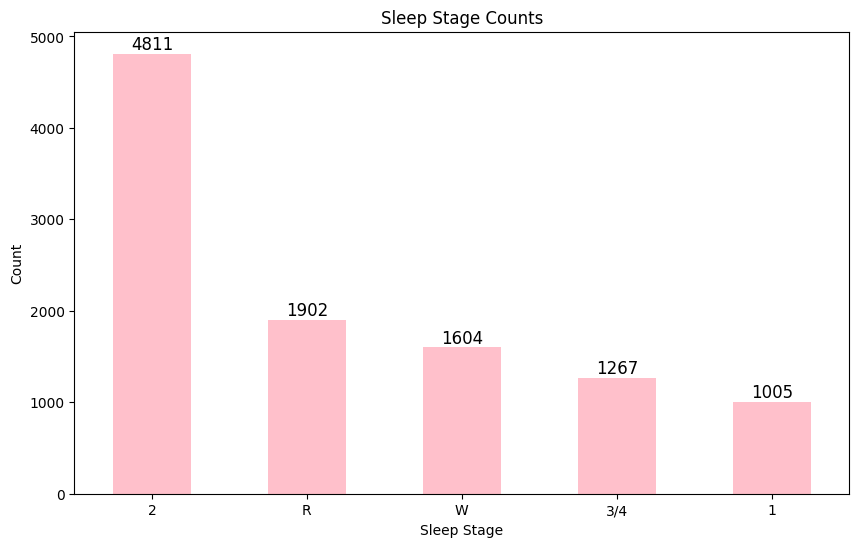

In [12]:
# Use the 'value_counts' function to count the occurrences of each value in the 'Stage' column
stage_counts = combined_df['Stage'].value_counts()

# Define the mapping from numbers to sleep stages
stage_mapping = {1: 'W', 2: '1', 3: '2', 4: '3/4', 5: 'R'}

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = stage_counts.plot(kind='bar', color='pink')  # Change the bar color to pink

# Customize the plot labels and title
plt.xlabel('Sleep Stage')
plt.ylabel('Count')
plt.title('Sleep Stage Counts')

# Update the X-axis labels using the mapping
ax.set_xticks(range(len(stage_counts.index)))
ax.set_xticklabels([stage_mapping[x] for x in stage_counts.index], rotation=0)

# Add data labels to the bars
for i, v in enumerate(stage_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

# Show the bar chart
plt.show()

In [13]:
from imblearn.over_sampling import RandomOverSampler

x = combined_df.iloc[:, :-1].copy()
y = combined_df.iloc[:, -1].copy()

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(x, y)

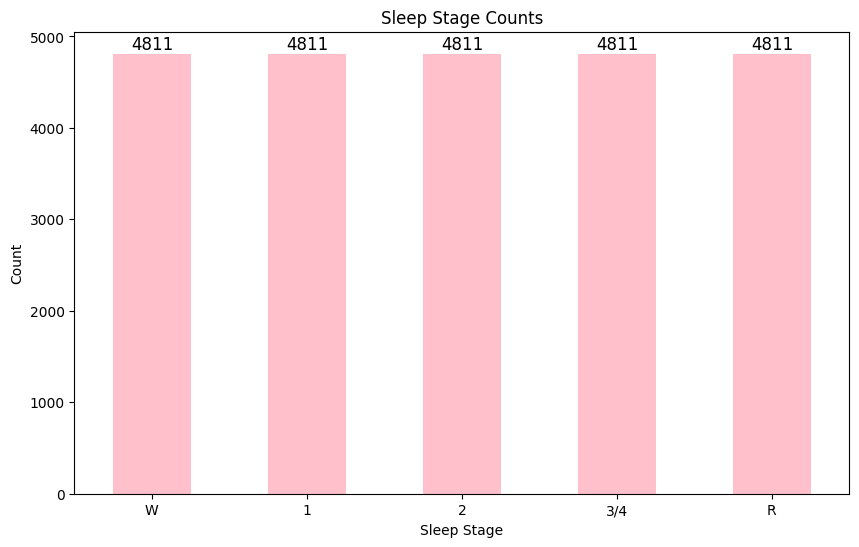

In [14]:
resam_df = pd.DataFrame(y_resampled, columns=["Stage"])

# Use the 'value_counts' function to count the occurrences of each value in the 'Stage' column
stage_counts = resam_df['Stage'].value_counts()

# Define the mapping from numbers to sleep stages
stage_mapping = {1: 'W', 2: '1', 3: '2', 4: '3/4', 5: 'R'}

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = stage_counts.plot(kind='bar', color='pink')  # Change the bar color to pink

# Customize the plot labels and title
plt.xlabel('Sleep Stage')
plt.ylabel('Count')
plt.title('Sleep Stage Counts')

# Update the X-axis labels using the mapping
ax.set_xticks(range(len(stage_counts.index)))
ax.set_xticklabels([stage_mapping[x] for x in stage_counts.index], rotation=0)

# Add data labels to the bars
for i, v in enumerate(stage_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

# Show the bar chart
plt.show()

In [15]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,
                                                    stratify=y_resampled,
                                                    shuffle=True,
                                                    random_state=42)

print('Train set: class label')
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

print('Test set:  class label')
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

Train set: class label
[[   1 3849]
 [   2 3849]
 [   3 3849]
 [   4 3848]
 [   5 3849]]
Test set:  class label
[[  1 962]
 [  2 962]
 [  3 962]
 [  4 963]
 [  5 962]]


In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
x_scaler = StandardScaler().fit(x_train)

x_scale_train = x_scaler.transform(x_train)
x_scale_test  = x_scaler.transform(x_test)

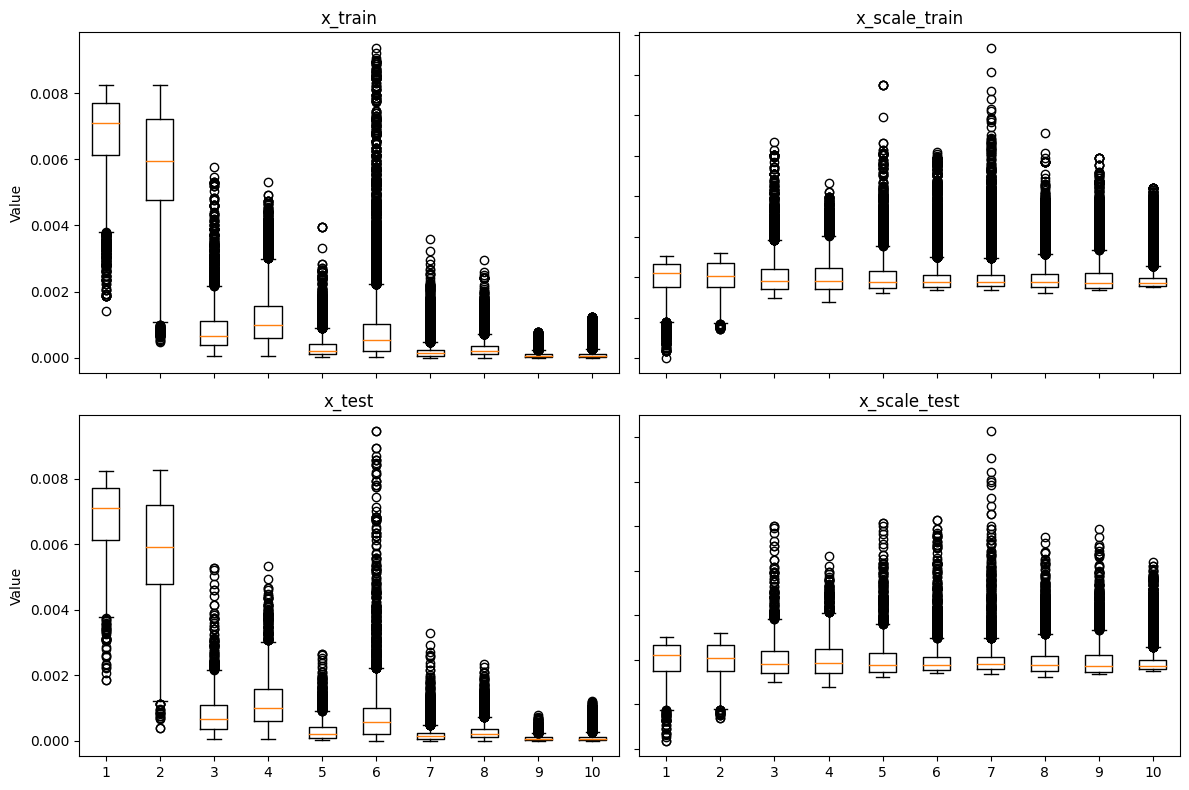

In [18]:
# Create subplots in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Compare x_train and x_scale_train
axs[0, 0].boxplot(x_train)
axs[0, 0].set_title("x_train")
axs[0, 1].boxplot(x_scale_train)
axs[0, 1].set_title("x_scale_train")

# Compare x_test and x_scale_test
axs[1, 0].boxplot(x_test)
axs[1, 0].set_title("x_test")
axs[1, 1].boxplot(x_scale_test)
axs[1, 1].set_title("x_scale_test")

# Set y-axis label
for ax in axs.flat:
    ax.set(ylabel="Value")

# Add labels to the x-axis
for ax in axs.flat:
    ax.label_outer()

# Adjust layout for better appearance
plt.tight_layout()

# Show the boxplots
plt.show()